# Mushroom Classification -Safe to eat or deadly poison?-

[Kaggle](https://www.kaggle.com/uciml/mushroom-classification)  


# Confusion Matrix
<img src="ConfusionMatrix.png" width="800">

# Sensitivity and Specificity, Recall and Precision

<img src="SensitivityandSpecificity.png" width="800">

# ROC curve

<img src="ROC.png" width="800">

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns


In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [3]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [4]:
df = pd.read_csv('mushrooms.csv')

In [5]:
df2 = pd.get_dummies(df.iloc[:, :5])

In [6]:
y = df2.iloc[:,0].values
X = df2.iloc[:,2:].values
c_name = df2.columns

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [9]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)
tree.fit(np.array(X_train), np.array(y_train))
print("DecisionTree:", "Training:", np.round(tree.score(X_train, y_train),3)*100, ", Test:", np.round(tree.score(X_test, y_test),3)*100)

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)
print("Logistic regression:", "Training:", np.round(lr.score(X_train, y_train),3)*100, ", Test:", np.round(lr.score(X_test, y_test),3)*100)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,max_depth=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
print("Random Forest:", "Training:", np.round(forest.score(X_train, y_train),3)*100, ", Test:", np.round(forest.score(X_test, y_test),3)*100)

DecisionTree: Training: 89.6 , Test: 89.4
Logistic regression: Training: 80.7 , Test: 81.1
Random Forest: Training: 89.5 , Test: 89.5


## Decision Tree

In [13]:
cm_train = metrics.confusion_matrix(y_train,tree.predict(X_train))
print(cm_train)
sensitivity_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Sensitivity(train) : ', sensitivity_train )
specificity_train = cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
print('Specificity(train) : ', specificity_train)
recall_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Recall(train) : ', recall_train )
precision_train = cm_train[0,0]/(cm_train[0,0]+cm_train[1,0])
print('Precision(train) : ', precision_train )

[[1856  108]
 [ 315 1783]]
Sensitivity(train) :  0.945010183299
Specificity(train) :  0.849857006673
Recall(train) :  0.945010183299
Precision(train) :  0.854905573468


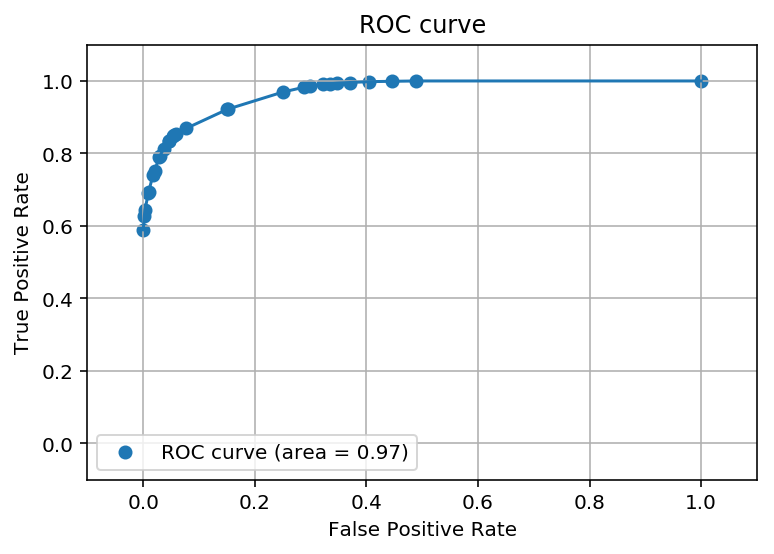

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,tree.predict_proba(X_train)[:,1])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.grid()
plt.show()

In [14]:
cm_test = metrics.confusion_matrix(y_test,tree.predict(X_test))
print(cm_test)
sensitivity_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('Sensitivity(test) : ', sensitivity_test)
specificity_test = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity(test) : ', specificity_test)
recall_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('Recall(test) : ', recall_test)
precision_test = cm_test[0,0]/(cm_test[0,0]+cm_test[1,0])
print('Precision(test) : ', precision_test)

[[1830  122]
 [ 309 1801]]
Sensitivity(test) :  0.9375
Specificity(test) :  0.85355450237
Recall(test) :  0.9375
Precision(test) :  0.85553997195


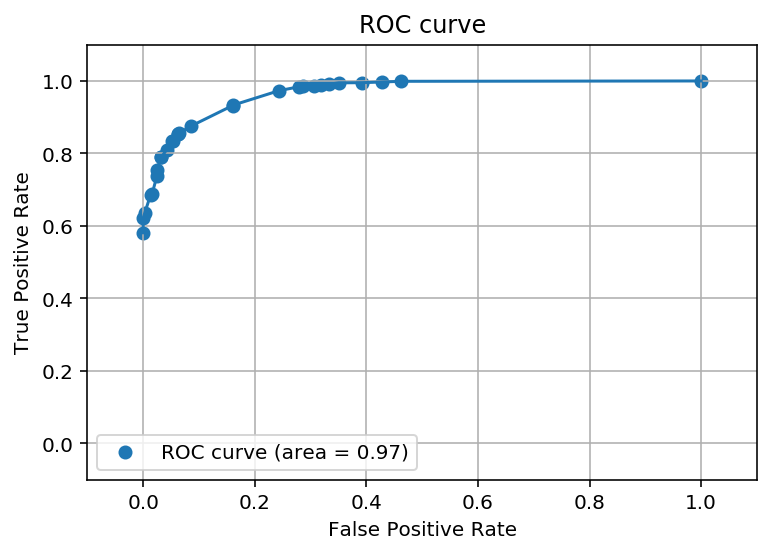

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,tree.predict_proba(X_test)[:,1])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.grid()
plt.show()

## Logistic regression

In [19]:
cm_train = metrics.confusion_matrix(y_train,lr.predict(X_train))
print(cm_train)
sensitivity_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Sensitivity(train) : ', sensitivity_train )
specificity_train = cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
print('Specificity(train) : ', specificity_train)
recall_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Recall(train) : ', recall_train )
precision_train = cm_train[0,0]/(cm_train[0,0]+cm_train[1,0])
print('Precision(train) : ', precision_train )

[[1577  387]
 [ 397 1701]]
Sensitivity(train) :  0.802953156823
Specificity(train) :  0.810772163966
Recall(train) :  0.802953156823
Precision(train) :  0.798885511651


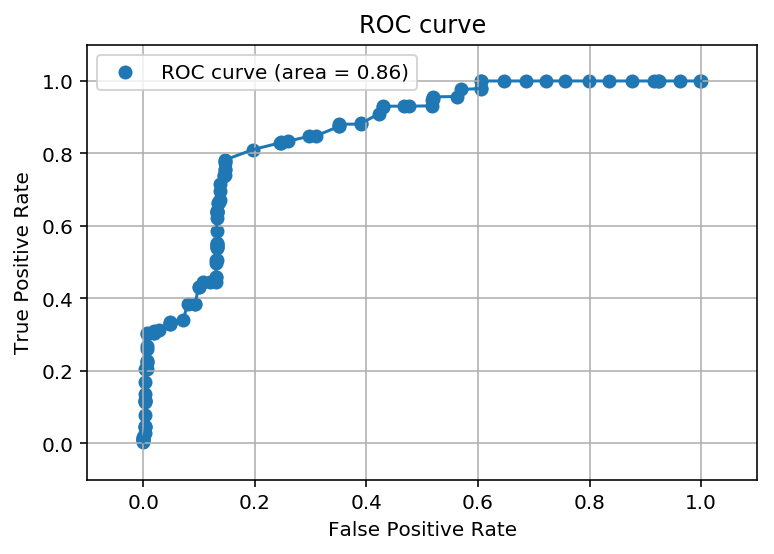

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,lr.predict_proba(X_train)[:,1])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.grid()
plt.show()

In [20]:
cm_test = metrics.confusion_matrix(y_test,lr.predict(X_test))
print(cm_test)
sensitivity_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('Sensitivity(test) : ', sensitivity_test)
specificity_test = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity(test) : ', specificity_test)
recall_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('Recall(test) : ', recall_test)
precision_test = cm_test[0,0]/(cm_test[0,0]+cm_test[1,0])
print('Precision(test) : ', precision_test)

[[1578  374]
 [ 395 1715]]
Sensitivity(test) :  0.808401639344
Specificity(test) :  0.812796208531
Recall(test) :  0.808401639344
Precision(test) :  0.799797263051


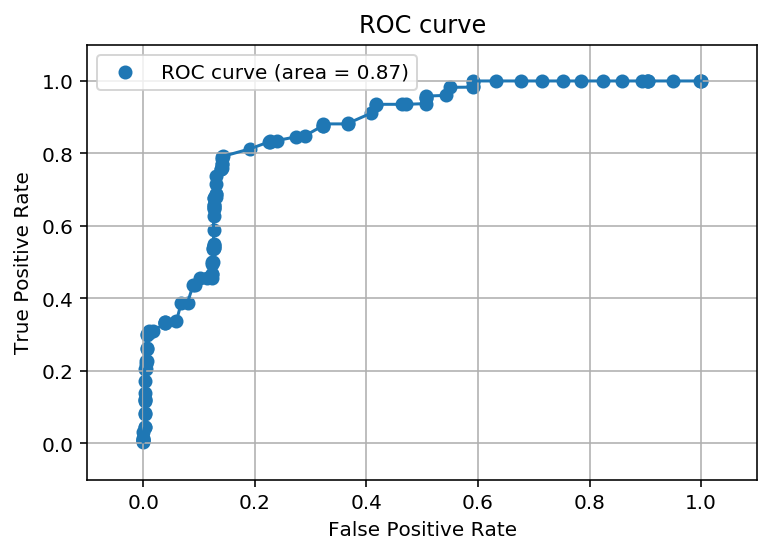

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict_proba(X_test)[:,1])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.grid()
plt.show()

## Random Forest

In [22]:
cm_train = metrics.confusion_matrix(y_train,forest.predict(X_train))
print(cm_train)
sensitivity_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Sensitivity(train) : ', sensitivity_train )
specificity_train = cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
print('Specificity(train) : ', specificity_train)
recall_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Recall(train) : ', recall_train )
precision_train = cm_train[0,0]/(cm_train[0,0]+cm_train[1,0])
print('Precision(train) : ', precision_train )

[[1848  116]
 [ 310 1788]]
Sensitivity(train) :  0.940936863544
Specificity(train) :  0.852240228789
Recall(train) :  0.940936863544
Precision(train) :  0.856348470806


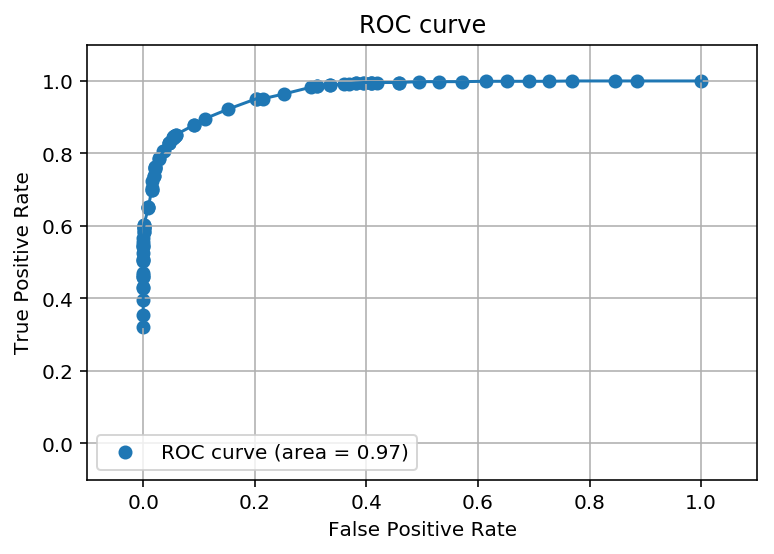

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,forest.predict_proba(X_train)[:,1])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.grid()
plt.show()

In [23]:
cm_test = metrics.confusion_matrix(y_test,forest.predict(X_test))
print(cm_test)
sensitivity_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('Sensitivity(test) : ', sensitivity_test)
specificity_test = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])
print('Specificity(test) : ', specificity_test)
recall_test = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
print('Recall(test) : ', recall_test)
precision_test = cm_test[0,0]/(cm_test[0,0]+cm_test[1,0])
print('Precision(test) : ', precision_test)

[[1827  125]
 [ 302 1808]]
Sensitivity(test) :  0.935963114754
Specificity(test) :  0.856872037915
Recall(test) :  0.935963114754
Precision(test) :  0.858149365899


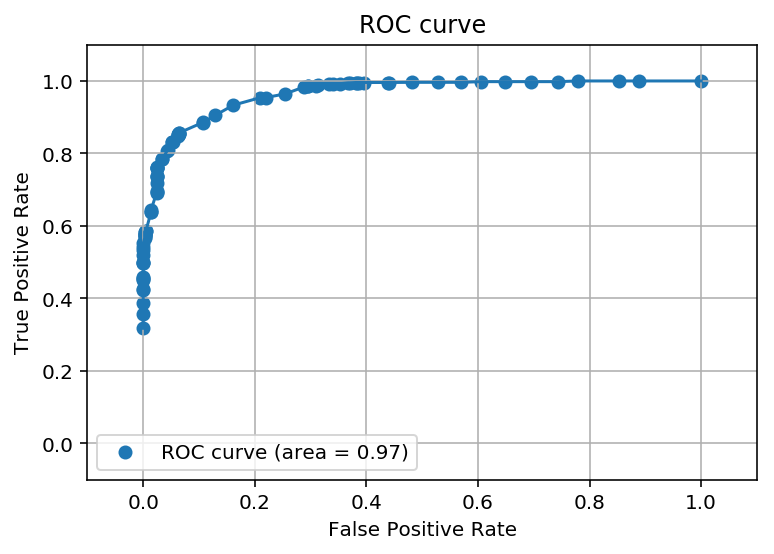

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,forest.predict_proba(X_test)[:,1])
auc = metrics.auc(fpr, tpr)
plt.scatter(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr, tpr)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.grid()
plt.show()